In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob,Word

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import texthero as hero
#from texthero import stopwords
from nltk.corpus import stopwords
from nltk.corpus import words
import os
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('words')

/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/Users/ak/Desktop/neuefische/NLPower-capstone-project/data/nlp-getting-started/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


<AxesSubplot:>

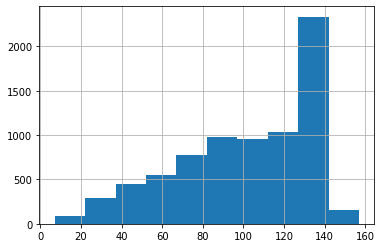

In [6]:
#No. characters per tweet
df['tweet_length'] = [len(text) for text in df['text']]
df['text'].str.len().hist()

<AxesSubplot:>

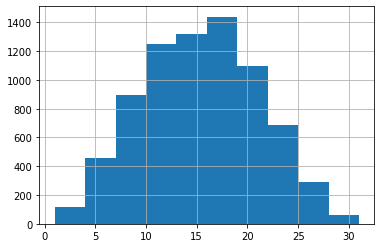

In [7]:
#No. words per tweet
df['nwords'] = [len(text.split()) for text in df['text']]

text = df['text']
text.str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

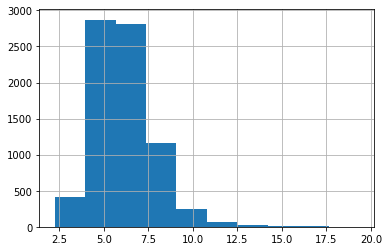

In [8]:
#Average word length
text.str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [9]:
avgwordlength = []
for t in df['text']:
    t = t.split()
    l = 0
    for w in t:
        l += len(w)
    if len(t) != 0:
        l = l / len(t)
    else:
        l = 0
    avgwordlength.append(l)

df['avgwordlength'] = avgwordlength

In [10]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))


In [11]:
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [12]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

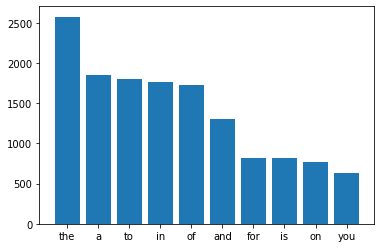

In [13]:
plot_top_stopwords_barchart(df['text'])

In [14]:
def lemma_per_pos(sent):
    '''function to lemmatize according to part of speech tag'''
    t = TextBlob(sent)
    t_dict = {"J": 'a',"N": 'n',"V": 'v',"R": 'r'}
    w_n_t = [(w, t_dict.get(p[0], 'n')) for w, p in t.tags]
    setofwords = set(words.words())
    lemmatized_list = [w.lemmatize(t) for w, t in w_n_t if w in setofwords]
    return " ".join(lemmatized_list)
def df_preprocessing(df,col_name):
    my_stopwords = stopwords.words('english') + ['http', 'co', 'amp', 'one', 'get', 'u']
    df[col_name]=[text.replace('<br','') for text in df[col_name]]
    # cleaning
    df[col_name]= (
              df[col_name]
              .pipe(hero.clean)
              .pipe(hero.remove_html_tags)
              .pipe(hero.remove_brackets)
              .pipe(hero.remove_urls))
    # lemmatization
    df[col_name] = [lemma_per_pos(sent) for sent in df[col_name]]
    df[col_name] = hero.remove_stopwords(df[col_name],my_stopwords)
    

In [15]:
import copy
df2 = copy.deepcopy(df)

In [16]:
df_preprocessing(df, 'text')

In [17]:
# i = 0
# for text in df['text']:
#     print(i)
#     print(str(TextBlob(text).correct()))
#     df['text'][i] = str(TextBlob(text).correct())
#     i += 1

In [18]:
for i in range(0, len(df['text'])):
    df['text'][i] = ' '.join([w for w in df['text'][i].split() if len(w) > 2])

/var/folders/hm/0f07kjyd01j1bkt20sx53n3m0000gn/T/ipykernel_6501/815009689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join([w for w in df['text'][i].split() if len(w) > 2])


In [19]:
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

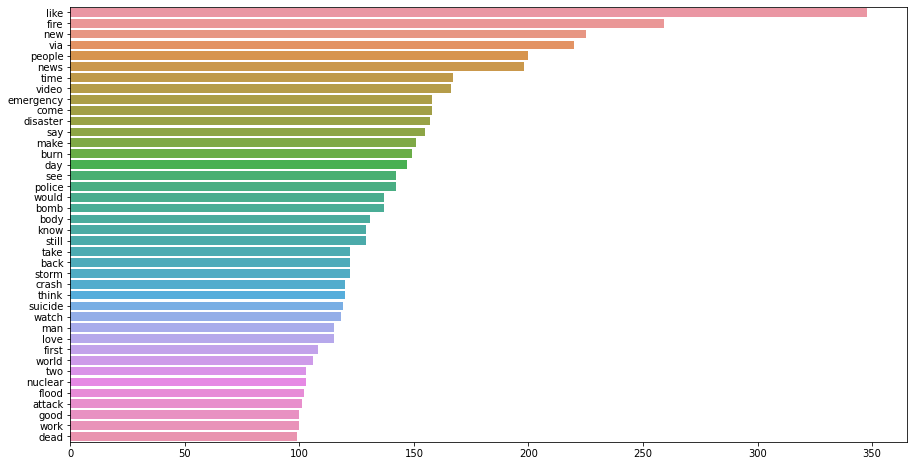

In [20]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x)

In [21]:
text= ' '.join(t for t in df['text'])
words_list= text.split()

In [22]:
word_freq= {}
for word in set(words_list):
    word_freq[word]= words_list.count(word)
#Creating dataframe of words
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])

In [23]:
df_word['word_len']= df_word['word'].map(lambda x: len(x))
# sorting values 
df_word=df_word.sort_values('word_len',ascending=False).reset_index(drop=True)
df_word

,word,count,word_len
0,indistinguishable,1,17
1,multidimensional,1,16
2,institutionalize,1,16
3,totalitarianism,1,15
4,diversification,1,15
...,...,...,...
5849,ama,1,3
5850,zip,1,3
5851,ton,1,3
5852,gut,1,3


/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count', ylabel='word'>

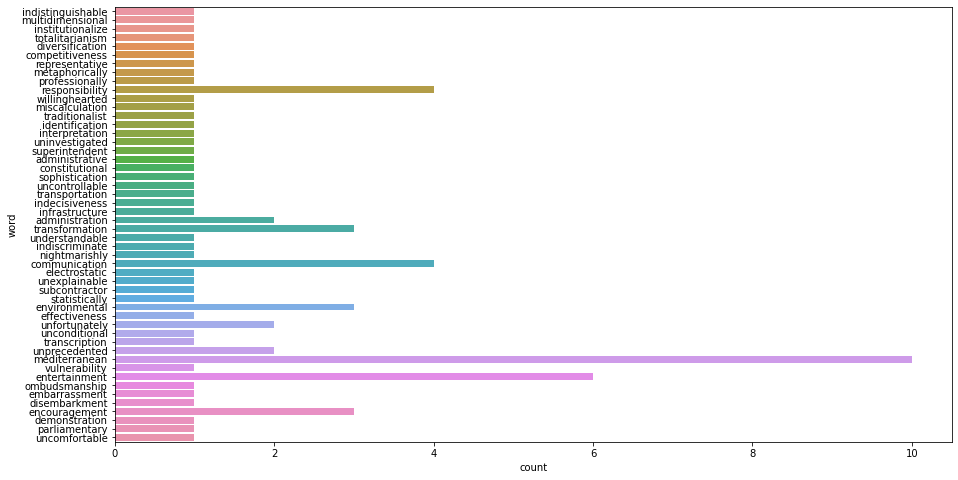

In [24]:
df_top= df_word.head(50)
plt.figure(figsize=(15,8))
sns.barplot(df_top['count'],df_top['word'])

/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/wordcloud/wordcloud.p

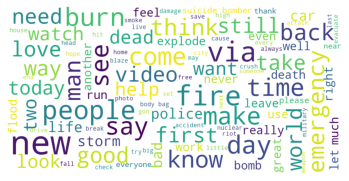

In [25]:
wordcloud = WordCloud(background_color="white",max_words=100,
                      max_font_size=40,
                      scale=3,
                      random_state=1).generate(text)
plt.axis('off')
plt.imshow(wordcloud)

In [26]:
df['polarity'] = [TextBlob(text).sentiment[0] for text in df['text']]
df['subjectivity'] = [TextBlob(text).sentiment[1] for text in df['text']]



<AxesSubplot:>

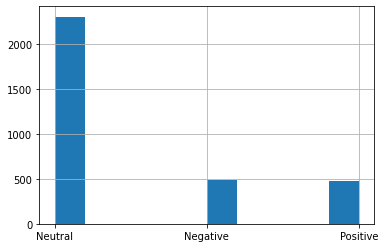

In [27]:
def polarity(x):
    if TextBlob(x).sentiment[0]<-0.1:
       return 'Negative'
    if TextBlob(x).sentiment[0]>0.1:
       return 'Positive'
    return 'Neutral'
df['sentiment']= df['text'].map(lambda x: polarity(x))
df['sentiment'][df['target'] == 1].hist()

<AxesSubplot:>

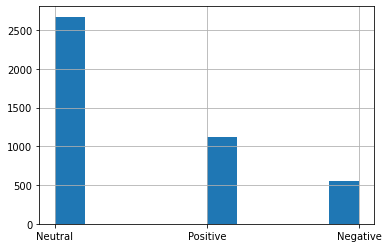

In [28]:
df['sentiment'][df['target'] == 0].hist()

In [29]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

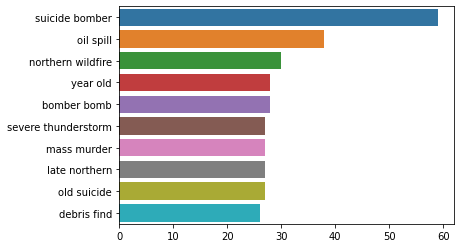

In [30]:
top_n_bigrams=get_top_ngram(df['text'][df['target'] == 1],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

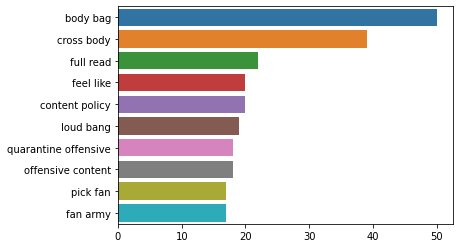

In [31]:
top_n_bigrams=get_top_ngram(df['text'][df['target'] == 0],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

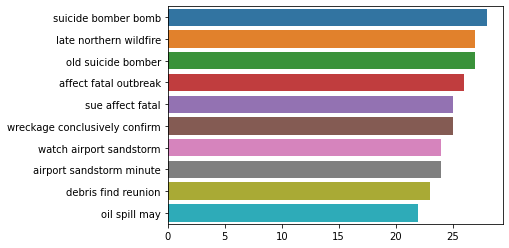

In [32]:
top_n_bigrams=get_top_ngram(df['text'][df['target'] == 1],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [3]:

def preprocess_tweets(x):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tweets in x:
        words=[w for w in word_tokenize(str(x)) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_tweets(df['text'])

NameError: name 'stop' is not defined

In [34]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [35]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.052*"..." + 0.035*"bike" + 0.033*"shelter" + 0.032*"northern" + 0.027*"place" + 0.027*"evacuation" + 0.022*"state" + 0.021*"photo" + 0.021*"volcano" + 0.020*"Length"'),
 (1,
  '0.042*"..." + 0.038*"place" + 0.037*"evacuation" + 0.034*"shelter" + 0.033*"bike" + 0.032*"northern" + 0.022*"tro" + 0.020*"investigate" + 0.019*"7608" + 0.019*"fire"'),
 (2,
  '0.053*"..." + 0.031*"shelter" + 0.030*"northern" + 0.029*"place" + 0.029*"bike" + 0.029*"evacuation" + 0.020*"forgive" + 0.019*"7613" + 0.019*"object" + 0.019*"nearby"'),
 (3,
  '0.046*"..." + 0.037*"evacuation" + 0.036*"northern" + 0.035*"place" + 0.032*"bike" + 0.031*"shelter" + 0.019*"notify" + 0.019*"tro" + 0.018*"ruby" + 0.018*"dtype"')]

In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003901  0.000141       1        1  25.116308
2     -0.000417  0.000904       2        1  25.110547
3      0.000757 -0.001659       3        1  24.994671
1      0.003561  0.000613       4        1  24.778474, topic_info=        Term         Freq         Total Category  logprob  loglift
50       tro  7621.000000   7621.000000  Default  30.0000  30.0000
34    object  7599.000000   7599.000000  Default  29.0000  29.0000
52   volcano  7616.000000   7616.000000  Default  28.0000  28.0000
21    forest  7610.000000   7610.000000  Default  27.0000  27.0000
48     state  7622.000000   7622.000000  Default  26.0000  26.0000
..       ...          ...           ...      ...      ...      ...
10      bike  3840.025838  15234.076715   Topic4  -3.4163   0.0171
51       two  1911.423635   7613.601807   Topic4  -4.1139   0.0131
32  northern  3751.733196  15228.164227   Topic4  -3.4396  -0.0057
22   forgive  1861.087183   7605.693365   Topic4  -4.1406  -0.0125
0        ...  4950.336482  22823.471107   Topic4  -3.1623  -0.1331

[160 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.270073       ...
0         2  0.274849       ...
0         3  0.238176       ...
0         4  0.216882       ...
1         1  0.219574      7608
...     ...       ...       ...
53        4  0.267162      wild
54        1  0.244282  wildfire
54        2  0.268868  wildfire
54        3  0.281489  wildfire
54        4  0.205365  wildfire

[220 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

In [37]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(df['text'])
vectorizer2.get_feature_names_out()

array(['aba woman', 'abandon aircraft', 'abandon cabin', ..., 'zone send',
       'zone war', 'zoom face'], dtype=object)

In [90]:
df

,id,keyword,location,text,target,tweet_length,nwords,avgwordlength,polarity,subjectivity,sentiment
0,1,NaN,NaN,reason earthquake may forgive,1,69,13,4.384615,0.000000,0.000000,Neutral
1,4,NaN,NaN,forest fire near canada,1,38,7,4.571429,0.100000,0.400000,Neutral
2,5,NaN,NaN,shelter place notify evacuation shelter place,1,133,22,5.090909,0.000000,0.000000,Neutral
3,6,NaN,NaN,people receive evacuation,1,65,8,7.125000,0.000000,0.000000,Neutral
4,7,NaN,NaN,sent photo ruby smoke school,1,88,16,4.500000,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant hold bridge collapse nearby,1,83,11,6.636364,0.000000,1.000000,Neutral
7609,10870,NaN,NaN,aria control wild even northern part state tro...,1,125,20,5.300000,0.100000,0.400000,Neutral
7610,10871,NaN,NaN,volcano,1,65,8,7.250000,0.000000,0.000000,Neutral
7611,10872,NaN,NaN,police investigate bike car little bike rider ...,1,137,19,6.263158,-0.260417,0.583333,Negative


In [38]:
# Train test split
from sklearn.model_selection import train_test_split

y = df2.pop('target')

# Split the train, test, validation set
X_train, X_test, y_train, y_test = train_test_split(df2['text'], y, test_size=0.2, random_state=42)

# Print values
print("Train:",len(X_train), "Test:", len(X_test))

Train: 6090 Test: 1523


In [12]:
import string
import re
import spacy
import contextualSpellCheck

# Load the English library from SpaCy
nlp = spacy.load("en_core_web_sm")

# Add contextual spell check to pipeline
nlp.add_pipe("contextual spellchecker", config={"max_edit_dist": 5})    

# Create list of punctuation marks
punctuations = string.punctuation

# Create list of stopwords from spaCy
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Remove URLs
def remove_urls(text):
    text = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    return text

# Creat tokenizer function
def spacy_tokenizer(sentence):
    # Create token object from spacy
    docs = nlp(sentence)

    # Correct spelling
    tokens = docs._.outcome_spellCheck
    #tokens = sentence
    tokens = nlp(tokens)

    # Lemmatize each token and convert each token into lowercase
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "PROPN" else word.lower_ for word in tokens]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
    
    # Remove links
    tokens = [remove_urls(word) for word in tokens]
    
    # return preprocessed list of tokens
    return tokens

spacy_tokenizer(df['text'][0])

[]

In [19]:
# Load the English library from SpaCy
nlp = spacy.load("en_core_web_sm")

# Add contextual spell check to pipeline
nlp.add_pipe("contextual spellchecker", config={"max_edit_dist": 5})    

# Create list of punctuation marks
punctuations = string.punctuation

# Create list of stopwords from spaCy
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [20]:
sentence = df['text'][0]
docs = nlp(sentence)
tokens = docs._.outcome_spellCheck

In [21]:
tokens

''

In [11]:
spacy_tokenizer('hello, how are you')

[]

In [ ]:
# Bag-of-words data transformation
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

# Custom transformer class using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Implement clean_text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Remove spaces and converte text into lowercase
    return text.strip().lower()

# Bag-of-words data transformation
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [ ]:
# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

# Create pipeline using Bag of Words
pipe_NB = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe_NB.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x17cc46f70>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x127ac4160>)),
                ('classifier', MultinomialNB())])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = pipe_NB.predict(X_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       874
           1       0.78      0.73      0.75       649

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.79      1523



In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()

# Create pipeline using Bag of Words
pipe_log = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier_log)])

# model generation
pipe_log.fit(X_train,y_train)

/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x17cc46e20>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x127ac4160>)),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = pipe_log.predict(X_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       874
           1       0.82      0.72      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [ ]:
# SVM Classifier
from sklearn.svm import SVC
classifier_svm = SVC()

# Create pipeline using Bag of Words
pipe_svm = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier_svm)])

# model generation
pipe_svm.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x17cc79640>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x127ac4160>)),
                ('classifier', SVC())])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = pipe_svm.predict(X_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.85      0.66      0.75       649

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.81      0.80      1523



In [ ]:
# XGB Classifier
import xgboost as xgb
classifier_xgb = xgb.XGBClassifier()

# Create pipeline using Bag of Words
pipe_xgb = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier_xgb)])

# model generation
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x17f0da820>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x127ac4160>)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = pipe_xgb.predict(X_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [ ]:
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(df['text'])

# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(df['text'])
print("X_train_vectorized: ")
X_train_vectorized

X_train_vectorized: 


<7613x5854 sparse matrix of type '<class 'numpy.int64'>'
	with 41370 stored elements in Compressed Sparse Row format>

In [51]:
# Initialize config files from base_config
!python -m spacy init fill-config ../config/base_config.cfg ../config/config.cfg

✔ Auto-filled config with all values
✔ Saved config
../config/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [41]:
df3 = df[['text', 'target']]

In [42]:
data = tuple(zip(df.text.tolist(), df.target.tolist()))

In [46]:
import spacy

In [47]:
nlp=spacy.load('en_core_web_sm')

In [49]:
import tqdm

In [58]:
def remove_url(text): 
    '''
    Remove urls from text.
    ---
    Input:
    text (str): a sentence

    Output:
    parsed_text (str): text that has url removed
    '''

    # Use regrex to parse urls from the text
    parsed_text = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    return parsed_text

def preprocess(df, embed):
    '''
    Preprocess the dataframe into spacy pipeline for later classification
    ---
    Input:
    df (DataFrame): Pandas dataframe containing the raw text and outputs.
    embed (str): Name of pipeline embedding used

    Output:
    df (DataFrame): Preprocessed input dataframe
    docs (doc): SpaCy doc object that stores text data along with classification
    '''

    # Remove urls from text
    df.text = df.text.apply(remove_url)

    # Store the data into tuples
    data = tuple(zip(df.text.tolist(), df.target.tolist())) 
    
    # Load English library from SpaCy
    nlp=spacy.load(embed)
    print(data[0])

    # Storage for docs
    docs = []

    # One-hot encoding for the classifications
    for doc, label in nlp.pipe(data, as_tuples=True):
        
        if label==1:
            doc.cats['label'] = 1
        else:
            doc.cats['label'] = 0
        # print(doc.cats)
        
        docs.append(doc)
    return df, docs

In [71]:
# Split the train, test, validation set
train, test = train_test_split(df3[['text', 'target']], test_size=0.2, random_state=42)

In [75]:
from spacy.tokens import DocBin

# Preprocess the dataframes for train data
train_data, train_docs = preprocess(train,"en_core_web_sm")

# Save data and docs in a binary file to disc
doc_bin = DocBin(docs=train_docs)
doc_bin.to_disk("../data/spacy_data/textcat_train.spacy")

# Preprocess the dataframes for test data
test_data, test_docs = preprocess(test,"en_core_web_sm")
# Save data and docs in a binary file to disc
doc_bin = DocBin(docs=test_docs)
doc_bin.to_disk("../data/spacy_data/textcat_valid.spacy")

('new weapon cause imaginable destruction', 1)


In [89]:
!python -m spacy train ../config/config.cfg --paths.train ../data/spacy_data/textcat_train.spacy --paths.dev ../data/dev/dev.spacy

ℹ No output directory provided
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
[2022-07-21 09:28:44,941] [INFO] Set up nlp object from config
[2022-07-21 09:28:44,945] [INFO] Pipeline: ['tok2vec', 'textcat']
[2022-07-21 09:28:44,947] [INFO] Created vocabulary
Traceback (most recent call last):
  File "/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/spacy/language.py", line 1295, in initialize
    init_vocab(
  File "/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/spacy/training/initialize.py", line 131, in init_vocab
    load_vectors_into_model(nlp, vectors)
  File "/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/spacy/training/initialize.py", line 152, in load_vectors_into_model
    vectors_nlp = load_model(name, vocab=nlp.vocab, exclude=exclude)
  File "/Users/ak/Desktop/neue

In [85]:
sentences = train.target

In [86]:
sentences.value_counts()

0    3468
1    2622
Name: target, dtype: int64

In [87]:
from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

Downloading: 100%|██████████| 226k/226k [00:00<00:00, 546kB/s] 
Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 18.0kB/s]
Downloading: 100%|██████████| 570/570 [00:00<00:00, 348kB/s]


In [88]:
MAX_LEN = 256

In [ ]:
input_ids = [tokenizer.encode(sent, add_special_tokens=True,max_length=MAX_LEN,pad_to_max_length=True,truncation=True) for sent in sentences]

In [ ]:
labels = df_train.label.values

print("Actual sentence before tokenization: ",sentences[2])
print("Encoded Input from dataset: ",input_ids[2])

## Create attention mask
attention_masks = []
## Create a mask of 1 for all input tokens and 0 for all padding tokens
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]
print(attention_masks[2])